<a href="https://colab.research.google.com/github/ThakdanaiSaelee/CE903_group_project/blob/main/Program/data_prepatation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/ThakdanaiSaelee/CE903_group_project/main/dataset/x_train.csv', header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419
0,0.010254,0.081055,0.062500,-0.091797,-0.057617,-0.084473,0.056641,0.061523,0.039062,-0.125490,-0.075684,-0.054688,0.016113,0.023926,0.032715,0.086914,0.065918,0.021973,-0.086914,-0.058594,0.002930,-0.13574,-0.053223,0.005859,0.039551,0.026855,0.072266,-0.061035,0.011230,0.007324,-0.104980,-0.163090,-0.200200,0.074219,0.020020,0.022461,-0.258790,-0.119140,-0.086914,0.036133,...,0.005859,0.059082,0.004394,-0.005371,0.016113,0.027832,-0.007812,0.036621,0.007324,0.015137,-0.057617,-0.003418,0.037598,-0.012695,-0.058105,-0.020508,0.085938,0.040527,0.177250,-0.085449,-0.108400,-0.100590,0.152340,0.083008,0.122560,0.055176,0.095215,0.043945,0.14551,0.11035,0.019531,0.045410,0.035156,0.070312,0.023926,-0.050293,-0.012207,0.041504,0.044434,0.095703
1,-0.023926,0.076172,0.034180,-0.080078,-0.026367,-0.105960,0.009277,0.041992,0.031738,-0.114260,-0.088867,-0.053223,0.053711,0.032715,-0.000488,0.037109,0.048340,0.011230,-0.084473,-0.053223,-0.047363,-0.14844,-0.091309,-0.003418,-0.037598,-0.006836,-0.017090,-0.045410,0.015137,-0.030273,-0.118650,-0.133300,-0.149900,-0.007812,-0.028809,-0.018555,-0.176270,-0.053711,-0.070801,0.069336,...,0.019043,0.058594,0.043457,0.046387,0.033203,0.075195,0.008789,-0.019043,-0.025879,-0.017090,-0.021484,0.025391,0.097656,-0.049316,-0.039551,-0.015137,-0.000488,-0.030273,0.120610,-0.045898,-0.033203,-0.053711,0.142580,0.163570,0.137210,0.021973,0.079102,0.033203,0.20459,0.16943,0.134770,0.116210,0.073730,0.084473,0.007812,-0.053711,-0.034668,0.063965,0.070801,0.067871
2,-0.009766,0.077637,0.065918,-0.073730,0.004883,-0.086426,-0.078613,0.015625,0.012695,-0.109860,-0.115720,-0.081055,-0.015137,-0.084961,-0.059082,0.031738,0.076660,0.019043,-0.064453,-0.080566,-0.088867,-0.13623,-0.103520,-0.041504,-0.011230,0.039551,-0.017090,-0.006836,0.039062,-0.017578,-0.068848,-0.083984,-0.067871,-0.048340,-0.034180,-0.045898,-0.084473,-0.055664,-0.045898,0.127440,...,0.005859,0.077148,0.056152,0.058594,0.051270,0.061035,-0.021484,-0.093750,-0.085449,-0.043457,-0.009277,0.024414,0.082031,-0.075684,-0.013184,-0.028320,0.027344,0.009277,0.115720,0.056641,0.083984,-0.002441,0.029785,0.104490,0.128420,-0.040527,-0.013672,-0.007324,0.21436,0.17725,0.162110,0.135740,0.081543,0.042480,0.040527,0.019043,-0.011719,0.050781,0.050293,-0.002441
3,0.048828,0.112300,0.123050,-0.067871,-0.020996,-0.076172,-0.157230,-0.002930,-0.024902,-0.101070,-0.090332,-0.073730,-0.046387,-0.061035,-0.021484,0.030762,0.043945,-0.000488,-0.037598,-0.094238,-0.087891,-0.12061,-0.059570,-0.041504,0.035156,0.067871,0.007324,0.027832,0.050781,0.005371,-0.030762,0.023926,0.034180,-0.017090,-0.040039,-0.042480,0.005371,-0.033691,-0.010254,0.154790,...,-0.013184,0.101560,0.084473,0.041504,0.055176,0.069336,-0.026367,-0.143550,-0.132320,-0.078125,-0.053223,-0.099121,-0.156740,-0.040039,0.034180,0.003906,0.046875,-0.009277,0.098633,0.101070,0.102050,0.035156,-0.051270,0.074219,0.111820,-0.083008,-0.052246,-0.033203,0.20361,0.12207,0.160640,0.101560,0.058594,0.003906,0.104980,0.063477,-0.006348,0.053223,0.066895,-0.007812
4,-0.038086,0.037109,0.066895,-0.092773,-0.029297,-0.067871,-0.153320,-0.011230,-0.027344,-0.097168,-0.090332,-0.033691,-0.022949,0.042969,0.080566,0.015137,0.034668,0.034180,-0.000977,-0.022949,-0.051270,-0.11768,-0.018066,-0.006348,0.081055,0.105470,0.067871,0.082520,0.032715,0.015137,0.032227,0.071289,0.115720,0.043457,0.038574,-0.026367,0.077148,-0.010254,0.044922,0.163570,...,-0.029785,0.078125,0.026367,-0.007324,0.002441,0.017578,-0.082520,-0.091309,-0.094727,-0.062012,-0.065918,-0.156250,-0.295410,-0.032227,0.020020,0.013672,0.022461,-0.075684,0.066895,0.080078,0.089844,0.079590,-0.010742,0.099609,0.094238,-0.099121,-0.106450,-0.074219,0.16211,0.10205,0.144040,0.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1152 entries, 0 to 1151
Columns: 420 entries, 0 to 419
dtypes: float64(420)
memory usage: 3.7 MB


In [ ]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419
count,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,...,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000
mean,-0.001096,-0.000807,-0.001366,-0.003607,-0.004327,-0.003292,0.001268,0.000935,0.000061,0.001479,-0.000201,0.000641,-0.001513,-0.002907,-0.001406,-0.002584,0.000657,-0.001126,-0.001692,-0.004127,-0.001909,0.001609,0.001353,-0.000046,-0.000032,0.000623,0.002382,-0.000190,-0.001375,-0.000454,0.000957,-0.000100,0.002292,0.001109,0.000638,0.001965,-0.001463,0.001577,0.000281,-0.000571,...,-0.000059,0.000468,-0.000294,0.000517,0.000932,0.000475,0.001347,0.000997,0.000959,0.001836,0.000303,0.001607,-0.000493,-0.006440,-0.006577,-0.005031,-0.000852,-0.001416,-0.000974,-0.000653,0.002001,0.000837,0.001171,0.001316,0.001515,0.001298,-0.001836,-0.000012,0.000488,-0.003188,-0.000958,-0.000747,0.002211,0.000488,0.001813,0.002936,0.001481,-0.000760,0.003910,0.000398
std,0.063368,0.069890,0.067713,0.067318,0.066974,0.075070,0.092757,0.073431,0.066523,0.059947,0.066609,0.072123,0.057152,0.068373,0.078128,0.105778,0.088446,0.085308,0.104300,0.078513,0.066643,0.076156,0.075339,0.101978,0.101409,0.078354,0.077203,0.105138,0.080229,0.074353,0.110220,0.086217,0.091751,0.080449,0.069209,0.083293,0.110881,0.081772,0.069213,0.067876,...,0.054752,0.084390,0.084490,0.084691,0.090944,0.083172,0.076709,0.080874,0.097750,0.118419,0.122503,0.139898,0.120872,0.086840,0.097399,0.073200,0.128299,0.121198,0.107946,0.107182,0.119021,0.123501,0.115317,0.126384,0.093696,0.099621,0.101064,0.090894,0.122089,0.125809,0.125157,0.117597,0.150653,0.121240,0.076571,0.081800,0.089683,0.121255,0.104085,0.087604
min,-0.181150,-0.219730,-0.252440,-0.258300,-0.268550,-0.351070,-0.291990,-0.228520,-0.241210,-0.225590,-0.191410,-0.235350,-0.180660,-0.217290,-0.255370,-0.351070,-0.306640,-0.396000,-0.303710,-0.263670,-0.284670,-0.266110,-0.243160,-0.378910,-0.390620,-0.245120,-0.274410,-0.369140,-0.271000,-0.308590,-0.362790,-0.291990,-0.410160,-0.268070,-0.224610,-0.317870,-0.369630,-0.304690,-0.297360,-0.342770,...,-0.203610,-0.379390,-0.291500,-0.361820,-0.355960,-0.259770,-0.275390,-0.294920,-0.298340,-0.436040,-0.406740,-0.427250,-0.449710,-0.540530,-0.418950,-0.388670,-0.402830,-0.423340,-0.386720,-0.393550,-0.348140,-0.411130,-0.409670,-0.322750,-0.285160,-0.356930,-0.276860,-0.329100,-0.427250,-0.450200,-0.497560,-0.540040,-0.437500,-0.452640,-0.271970,-0.210940,-0.329100,-0.393070,-0.354490,-0.299800
25%,-0.041138,-0.047485,-0.047852,-0.046387,-0.049316,-0.047363,-0.056152,-0.046997,-0.041504,-0.038574,-0.044556,-0.048462,-0.037598,-0.050781,-0.050903,-0.066406,-0.054199,-0.048950,-0.066162,-0.054199,-0.041138,-0.045898,-0.046387,-0.057251,-0.054810,-0.053711,-0.045898,-0.065185,-0.054199,-0.045898,-0.070434,-0.059082,-0.053711,-0.044922,-0.044922,-0.046997,-0.063110,-0.052246,-0.041138,-0.043945,...,-0.035645,-0.038086,-0.053833,-0.046509,-0.

In [ ]:
data = data.values
sensor1 = np.zeros((1152,140))
sensor2 = np.zeros((1152,140))
sensor3 = np.zeros((1152,140))
column = 0
for i in range(420):
    if i%3 == 0 :
        sensor1[:,column] = data[:,i]
    elif i%3 == 1:
        sensor2[:,column] = data[:,i]
    elif i%3 == 2:
        sensor3[:,column] = data[:,i]
        column += 1
sensor1 = sensor1.T
sensor2 = sensor2.T
sensor3 = sensor3.T

In [ ]:
sensor1.shape

(140, 1152)

In [ ]:
sensor2.shape

(140, 1152)

In [ ]:
sensor3.shape

(140, 1152)

In [ ]:
print(sensor1)

[[ 0.010254  -0.023926  -0.0097656 ...  0.1084     0.17334    0.22559  ]
 [-0.091797  -0.080078  -0.07373   ...  0.026855   0.015137   0.019043 ]
 [ 0.056641   0.0092773 -0.078613  ...  0.013672   0.0063477 -0.038574 ]
 ...
 [ 0.04541    0.11621    0.13574   ... -0.065918  -0.050781   0.021484 ]
 [ 0.023926   0.0078125  0.040527  ... -0.22314   -0.18262   -0.027832 ]
 [ 0.041504   0.063965   0.050781  ...  0.098145   0.18311    0.18652  ]]


In [ ]:
print(sensor2)

[[ 0.081055   0.076172   0.077637  ...  0.13135    0.18359    0.24561  ]
 [-0.057617  -0.026367   0.0048828 ...  0.015625   0.023438   0.043945 ]
 [ 0.061523   0.041992   0.015625  ... -0.025879   0.003418  -0.0083008]
 ...
 [ 0.035156   0.07373    0.081543  ... -0.12305   -0.10059   -0.07666  ]
 [-0.050293  -0.053711   0.019043  ... -0.15674   -0.12012    0.025391 ]
 [ 0.044434   0.070801   0.050293  ...  0.0048828  0.1582     0.1582   ]]


In [ ]:
print(sensor3)

[[ 0.0625      0.03418     0.065918   ...  0.064941    0.10449
   0.12939   ]
 [-0.084473   -0.10596    -0.086426   ...  0.0097656   0.033691
   0.08252   ]
 [ 0.039062    0.031738    0.012695   ... -0.020508    0.0058594
  -0.0073242 ]
 ...
 [ 0.070312    0.084473    0.04248    ... -0.04541    -0.063477
  -0.033691  ]
 [-0.012207   -0.034668   -0.011719   ... -0.14941    -0.13037
  -0.00048828]
 [ 0.095703    0.067871   -0.0024414  ... -0.016113    0.092285
   0.13379   ]]


In [ ]:
tmin, tmax = 3, 8.9921 #We are only considering the data after 3 seconds as a decision is only made after that.

In [ ]:
!pip install mne

     |████████████████████████████████| 7.4 MB 5.0 MB/s 


In [ ]:
from mne.io import RawArray
import mne
import matplotlib

In [ ]:
info_sensor1 = mne.create_info(140, sfreq = 128, verbose=None, ch_types='eeg') #The no. of trials are 140 and each trial is sampled at 128 Hz. Hence, sfreq = 128.
raw = RawArray(sensor1, info = info_sensor1)
raw.crop(tmin, tmax) # Cropping the data to eliminate the first 3 seconds as a decision is not made during this time.

Creating RawArray with float64 data, n_channels=140, n_times=1152
    Range : 0 ... 1151 =      0.000 ...     8.992 secs
Ready.


<RawArray | 140 x 768 (6.0 s), ~976 kB, data loaded>

In [ ]:
info_sensor2 = mne.create_info(140, sfreq = 128, verbose=None, ch_types='eeg') #The no. of trials are 140 and each trial is sampled at 128 Hz. Hence, sfreq = 128.
raw2 = RawArray(sensor2, info = info_sensor2)
raw2.crop(tmin, tmax) # Cropping the data to eliminate the first 3 seconds as a decision is not made during this time.

Creating RawArray with float64 data, n_channels=140, n_times=1152
    Range : 0 ... 1151 =      0.000 ...     8.992 secs
Ready.


<RawArray | 140 x 768 (6.0 s), ~976 kB, data loaded>

In [ ]:
info_sensor3 = mne.create_info(140, sfreq = 128, verbose=None, ch_types='eeg') #The no. of trials are 140 and each trial is sampled at 128 Hz. Hence, sfreq = 128.
raw3= RawArray(sensor3, info = info_sensor3)
raw3.crop(tmin, tmax) # Cropping the data to eliminate the first 3 seconds as a decision is not made during this time.

Creating RawArray with float64 data, n_channels=140, n_times=1152
    Range : 0 ... 1151 =      0.000 ...     8.992 secs
Ready.


<RawArray | 140 x 768 (6.0 s), ~976 kB, data loaded>

Effective window size : 6.000 (s)


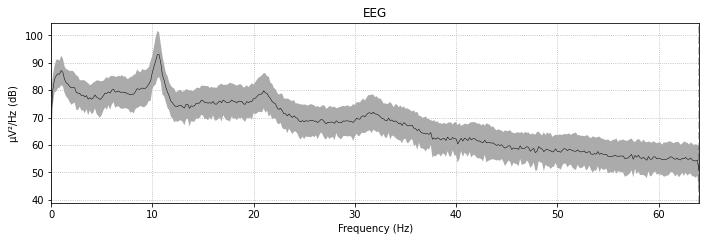

Text(0.5, 0.98, 'UnFiltered C3')

In [ ]:
fig = raw.plot_psd(fmax=64, average=True) # Visualizing Power-Line Noise in channel C3
fig.subplots_adjust(top=0.85)
fig.suptitle('UnFiltered C3', size='xx-large', weight='bold')

**Low and High filter**

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 10 - 22 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 10.00
- Lower transition bandwidth: 2.50 Hz (-6 dB cutoff frequency: 8.75 Hz)
- Upper passband edge: 22.00 Hz
- Upper transition bandwidth: 5.50 Hz (-6 dB cutoff frequency: 24.75 Hz)
- Filter length: 169 samples (1.320 sec)

Effective window size : 6.000 (s)


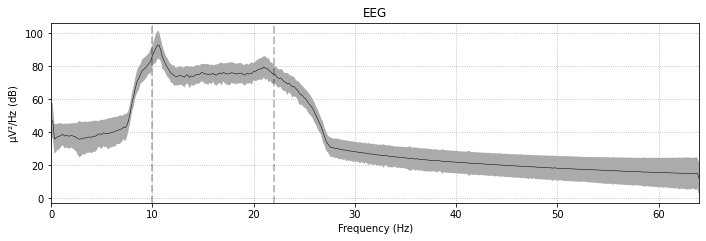

Text(0.5, 0.98, 'Filtered C3')

In [ ]:
raw_LowAndHigh = raw.copy().filter(10, 22)

fig = raw_LowAndHigh.plot_psd(fmin=0, fmax=64, average=True)

fig.suptitle('Filtered C3', size='xx-large', weight='bold')

In [ ]:
len(raw) 

768

In [ ]:
df_C3 = raw_LowAndHigh.to_data_frame()
df_C3

,time,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139
0,0,-1.531436e-12,-4.255494e-12,1.721171e-11,1.287490e-12,4.743385e-13,-3.610393e-11,8.782038e-12,2.710505e-13,2.724058e-12,-1.355253e-12,-3.388132e-13,2.694242e-11,8.294147e-12,-1.084202e-13,1.463673e-12,2.213805e-11,-1.989511e-11,1.620882e-11,1.517883e-12,-2.846031e-12,-1.301043e-12,-8.294147e-12,3.577867e-12,-2.453007e-12,1.154675e-11,9.161508e-12,-2.222614e-12,-4.987330e-12,-3.550762e-11,-1.057097e-11,7.237050e-12,2.195509e-11,-2.710505e-13,-1.556169e-11,3.182133e-11,1.160096e-11,7.643625e-12,-3.510105e-12,-1.049643e-11,...,1.517883e-11,1.214306e-11,1.067939e-11,4.496051e-11,7.589415e-13,-7.785927e-12,6.451003e-12,-2.087089e-11,6.451003e-12,-9.812030e-12,-2.300541e-12,1.531436e-12,-1.655441e-11,-2.764716e-12,-2.005774e-12,-5.109303e-12,-5.841139e-12,-1.120116e-11,-1.917683e-12,-3.659182e-12,6.044427e-12,1.003565e-11,1.992221e-12,-1.490778e-12,-1.378292e-11,-1.314256e-11,7.020209e-12,3.794708e-13,3.022214e-12,-2.886688e-12,1.301043e-11,2.233456e-11,-4.716279e-12,-1.122149e-11,-7.480995e-12,3.794708e-12,-5.827587e-12,1.360674e-11,-9.812030e-12,6.152847e-12
1,8,1.620747e+04,4.049300e+04,-6.529617e+04,-3.194983e+04,3.427041e+04,1.120809e+05,3.377750e+04,-1.082303e+05,9.320872e+04,-9.145248e+03,-8.123025e+04,-7.215909e+04,1.203710e+04,1.407733e+04,4.415837e+04,9.834837e+03,-9.682132e+03,-7.332333e+03,1.836373e+04,-1.902622e+04,2.047083e+04,-3.612478e+04,1.943689e+04,-4.315759e+04,-1.860831e+04,-7.646174e+03,-1.649514e+04,2.251775e+04,5.942890e+04,2.600226e+04,-7.285458e+04,-9.478197e+03,-1.407736e+05,5.548135e+03,-5.432271e+04,-4.029545e+04,-7.748767e+04,-3.460659e+04,3.170541e+04,...,3.269941e+04,1.039290e+04,-3.031711e+04,1.977802e+03,9.921813e+04,-1.853178e+04,1.092429e+04,-7.357991e+04,-3.930255e+04,-1.546129e+04,-4.282343e+04,-1.122643e+05,1.475658e+05,6.478305e+04,-5.045874e+03,1.638885e+04,-8.675883e+04,-9.445136e+03,-3.246883e+04,6.638865e+04,9.997383e+03,7.717046e+03,-4.301719e+03,3.489844e+03,6.475368e+04,2.191608e+04,-6.787537e+04,-1.222369e+04,5.615389e+04,3.537160e+03,-1.367117e+05,3.255349e+03,-2.369417e+05,4.308962e+04,-1.158301e+05,4.576459e+04,-1.169253e+05,6.816963e+02,6.373586e+03,4.671587e+04
2,16,2.642940e+04,5.690885e+04,-1.000389e+05,-4.196264e+04,4.359162e+04,1.730634e+05,4.951406e+04,-1.431392e+05,8.530616e+04,-9.857187e+03,-1.102661e+05,-1.427806e+05,2.181298e+04,7.113470e+03,8.741082e+04,3.608287e+04,-1.256615e+03,-1.011363e+04,2.327907e+04,-2.785839e+04,3.443218e+04,-4.581387e+04,2.000678e+04,-5.927927e+04,-4.173637e+04,4.763733e+03,-1.960687e+04,3.470752e+04,1.148962e+05,4.002593e+04,-1.055621e+05,-2.121352e+04,-1.988105e+05,3.802617e+03,-1.049028e+05,-5.887514e+04,-1.331539e+05,-3.932761e+04,5.393454e+04,...,-1.978815e+03,2.399596e+04,-2.230285e+04,-1.102191e+04,1.515444e+05,-1.142348e+03,3.633541e+04,-9.583643e+04,-4.333335e+04,-1.326522e+04,-5.576095e+04,-1.712074e+05,2.204794e+05,1.007445e+05,-3.281063e+03,2.058033e+04,-1.206199e+05,-8.748082e+03,-4.886030e+04,1.036436e+05,1.509769e+04,-6.475578e+02,-2.282829e+03,-3.311767e+03,1.076429e+05,3.358484e+04,-7.550649e+04,-1.549211e+04,8.189964e+04,8.275250e+03,-2.135816e+05,-1.218211e+04,-3.579907e+05,4.740235e+04,-1.803146e+05,3.580263e+04,-1.782282e+05,2.131728e+04,1.612373e+03,1.175242e+04
3,23,2.772697e+04,4.706218e+04,-9.357408e+04,-2.749667e+04,2.834091e+04,1.665814e+05,4.423584e+04,-8.440523e+04,-3.504110e+04,-2.259811e+03,-7.289298e+04,-1.845613e+05,2.738994e+04,-1.308676e+04,1.219824e+05,6.152120e+04,2.669315e+04,-3.292592e+03,7.041055e+03,-2.237392e+04,3.664542e+04,-2.661696e+04,7.945994e+02,-4.332881e+04,-5.852236e+04,3.395074e+04,-1.140003e+04,3.030518e+04,1.622463e+05,3.453284e+04,-8.723908e+04,-4.054788e+04,-1.515828e+05,-1.102847e+04,-1.402310e+05,-4.678908e+04,-1